# Spaceship Titanic - EDA

## Introduction

This dataset comes from the [Kaggle website](https://www.kaggle.com/competitions/spaceship-titanic/overview).

It's a fake dataset simulating a disaster similar to what happende toi the Titanic. A spaceship collide with an anomaly and some of its passengers were transported in another dimension. The objective is to predict wether a passenger were transported by the anomaly or not.

This dataset gathers several feature and one target.

#### Columns description:
- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- Destination - The planet the passenger will be debarking to.
- Age - The age of the passenger.
- VIP - Whether the passenger has paid for special VIP service during the voyage.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- Name - The first and last names of the passenger.
- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

## Summary

1. [Data import](#1-data-import)
2. [Dataset sanity check](#2-dataset-sanity-check)
    1. [DType](#1-dtype)
    2. [Missing values](#2-missing-values)
    3. [Duplicates](#3-duplicates)
3. [Target analysis](#3-target-analysis)
4. [Numerical features analysis](#4-numerical-features-analysis)
    1. [Distributions](#1-distributions)
    2. [Numerical features vs target](#2-numerical-features-vs-target)
        1. [Age vs target](#1-age-vs-target)
        2. [Amenities vs target](#2-amenities-vs-target)
    3. [Correlations between numerical features and the target](#3-correlations-between-numerical-features-and-the-target)
5. [Categorical features analysis](#5-categorical-features-analysis)
    1. [Unique values](#1-unique-values)
    2. [Categorical features vs target](#2-categorical-features-vs-target)
    3. [Categorical features vs numerical features](#3-categorical-features-vs-numerical-features)
    4. [Correlations in the dataset](#3-correlations-in-the-dataset)
6. ['Name' and 'Cabin' analysis](#6-name-and-cabin-analysis)
7. [Conclusion](#7-conclusion)

## 1. Data import

In [67]:
# Library import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [156]:
df = pd.read_csv('../datasets/train.csv')
target = 'Transported'
df.shape

(8693, 14)

In [157]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## 2. Dataset sanity check

### 1. DType

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB


Two values were wrongly typed: 'CryoSleep' and 'VIP'. They are strings but should be booleans.  
Moreover, all numeric features were typed as floats but could be integers once the missing values would have been infered.

### 2. Missing values

In [71]:
nb_rows = df.shape[0]
nb_data = df.shape[0] * df.shape[1]

def compute_prop(number, total, div_by_zero=np.nan, percent=True):
    ###Compute the proportion of 'number' over 'total'###
    if total == 0:
        return div_by_zero
    return (number / total) * (100 if percent else 1)

total_missings = 0

for column in df.columns:
    nb_missings = df[column].isna().sum(axis=0)
    total_missings += nb_missings
    prop = compute_prop(nb_missings, nb_rows)
    print(f'{column}: {nb_missings} missing values ({prop:.1f}%)')

prop_missings = compute_prop(total_missings, nb_data)
print(f'Total: {total_missings} missing values ({prop_missings:.1f}%)')

HomePlanet: 201 missing values (2.3%)
CryoSleep: 217 missing values (2.5%)
Cabin: 199 missing values (2.3%)
Destination: 182 missing values (2.1%)
Age: 179 missing values (2.1%)
VIP: 203 missing values (2.3%)
RoomService: 181 missing values (2.1%)
FoodCourt: 183 missing values (2.1%)
ShoppingMall: 208 missing values (2.4%)
Spa: 183 missing values (2.1%)
VRDeck: 188 missing values (2.2%)
Name: 200 missing values (2.3%)
Transported: 0 missing values (0.0%)
Total: 2324 missing values (2.1%)


It seems there is very few missing values in the dataset (~ 2% of the data).  
However, there is no information on the distribution of those missing values. Are they grouped on a few number of line or are they spread all across the dataset ?

<AxesSubplot:ylabel='PassengerId'>

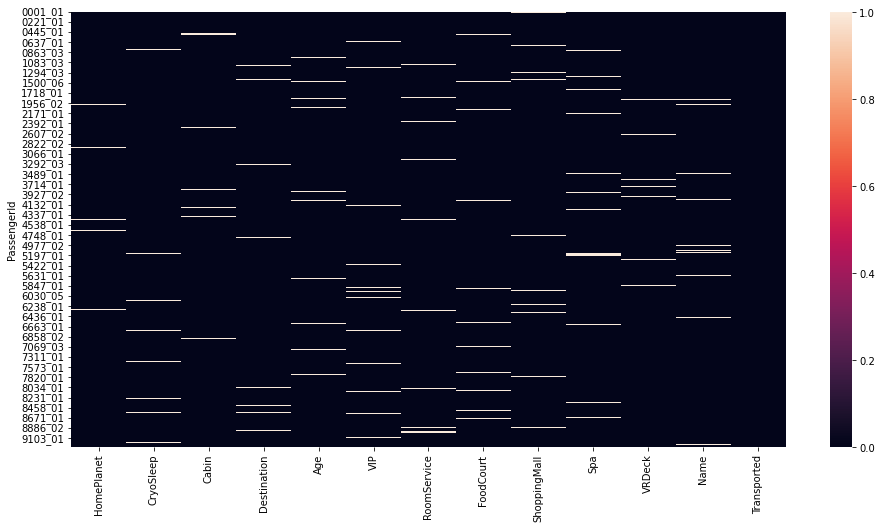

In [72]:
missings_df = df.isna()
plt.figure(figsize=(16, 8))
sns.heatmap(missings_df)

In [73]:
nb_multiple_missings = missings_df[missings_df.sum(axis=1) > 1].shape[0]
prop_multiple_missings = compute_prop(nb_multiple_missings, nb_rows)
nb_single_missing = missings_df[missings_df.sum(axis=1) == 1].shape[0]
prop_single_missing = compute_prop(nb_single_missing, nb_rows)
nb_without_missing = missings_df[missings_df.sum(axis=1) == 0].shape[0]
prop_without_missing = compute_prop(nb_without_missing, nb_rows)
print(f'{nb_single_missing} ({prop_single_missing:.1f}%) rows with only 1 missing value.')
print(f'{nb_multiple_missings} ({prop_multiple_missings:.1f}%) rows with 2 or more missing values.')
print(f'{nb_without_missing} ({prop_without_missing:.1f}%) rows without missing value.')

1867 (21.5%) rows with only 1 missing value.
220 (2.5%) rows with 2 or more missing values.
6606 (76.0%) rows without missing value.


There is a significant number of line with at least one missing value (24% of the lines). Dropping those lines won't be an option.  
The analysis of the features, particularly their distribution, will help determine how to infer the missing values.

### 3. Duplicates

In [74]:
df.duplicated().any()

False

There is no duplicated row.

## 3. Target analysis

In [75]:
target_distribution = df[target].value_counts()

for value in df[target].unique():
    value_count = target_distribution[value]
    prop = compute_prop(value_count, nb_rows)
    print(f'{value}: {value_count} ({prop:.1f}%) rows')

False: 4315 (49.6%) rows
True: 4378 (50.4%) rows


The target is quite well equilibrated with a gap of only 0.8% between the two unique values.

In [76]:
nb_transported = target_distribution[True]
nb_transported

4378

## 4. Numerical features analysis <a name="numerical-features-analysis"></a>

In [77]:
numerical_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

### 1. Distributions

In [78]:
df[numerical_columns].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


The range of 'Age' differs greatly from the range of the other features. A scaling will be mandatory to ensure machine learning convergence.

At first sight, only the 'Age' feature seems centered (mean and median are quite close).  
The other numerical features seems very skewed on the left (mean is higher than median).

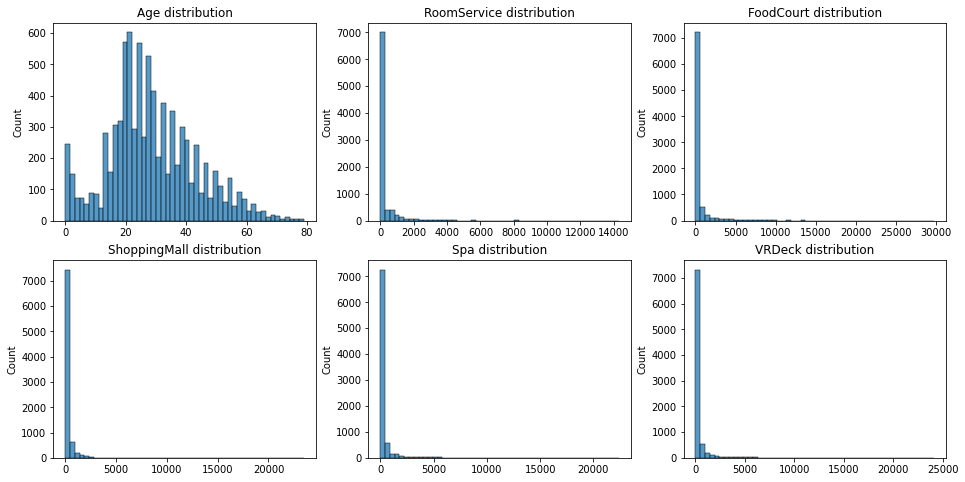

In [79]:
display_n_rows = 2
display_n_cols = int(np.ceil(len(numerical_columns) / display_n_rows))
nb_bins = 50

fig, axs = plt.subplots(nrows=display_n_rows, ncols=display_n_cols, figsize=(16, 8))

for idx, column in enumerate(numerical_columns):
    row = idx // display_n_cols
    col = idx % display_n_cols
    sns.histplot(data=df, x=column, bins=nb_bins, ax=axs[row, col])
    axs[row, col].set_title(f'{column} distribution')
    axs[row, col].set_xlabel('')

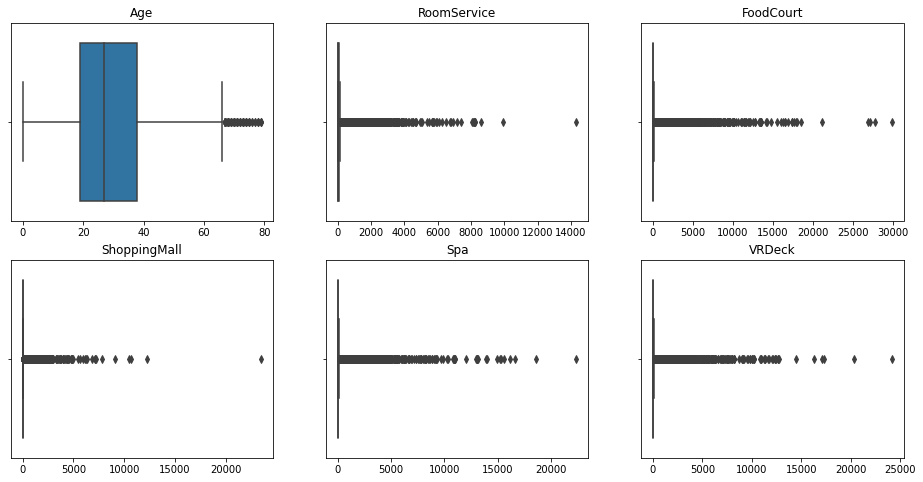

In [80]:
fig, axs = plt.subplots(nrows=display_n_rows, ncols=display_n_cols, figsize=(16, 8))

for idx, column in enumerate(numerical_columns):
    row = idx // display_n_cols
    col = idx % display_n_cols
    sns.boxplot(data=df, x=column, ax=axs[row, col])
    axs[row, col].set_title(f'{column}')
    axs[row, col].set_xlabel('')

plt.show()

In [81]:
skewed_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for column in skewed_columns:
    nb_zeros = df[df[column] == 0].shape[0]
    prop = compute_prop(nb_zeros, nb_rows)
    print(f'{column}: {nb_zeros} ({prop:.1f}%) rows are equal to 0.')

RoomService: 5577 (64.2%) rows are equal to 0.
FoodCourt: 5456 (62.8%) rows are equal to 0.
ShoppingMall: 5587 (64.3%) rows are equal to 0.
Spa: 5324 (61.2%) rows are equal to 0.
VRDeck: 5495 (63.2%) rows are equal to 0.


In [130]:
for column in skewed_columns:
    third_quartile = df[column].quantile(0.75)
    nb_outliers = df[df[column] > third_quartile].shape[0]
    prop = compute_prop(nb_outliers, nb_rows)
    print(f'{column}: {nb_outliers} ({prop:.1f}%) rows are outliers.')

RoomService: 2124 (24.4%) rows are outliers.
FoodCourt: 2127 (24.5%) rows are outliers.
ShoppingMall: 2118 (24.4%) rows are outliers.
Spa: 2125 (24.4%) rows are outliers.
VRDeck: 2122 (24.4%) rows are outliers.


The features concerning the amount of money spent in the luxury amenities show a lot of outliers. More than the half of the population didn't spent anything there.  
During the training of the model, several methods will have to be tested to choose the correct way to deal with them:
- Capping using different threshold (third quartile, multiple of the standard deviation) ;
- Infering mean or median.

Text(0.5, 0.98, 'total_spent')

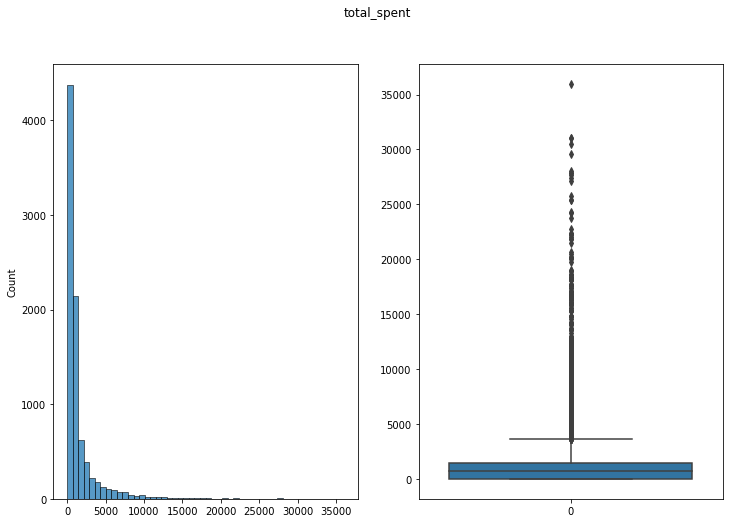

In [82]:
total_spent = df[skewed_columns].sum(axis=1)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
sns.histplot(data=total_spent, bins=nb_bins, ax=axs[0])
sns.boxplot(data=total_spent, ax=axs[1])
fig.suptitle('total_spent')

In [131]:
zero_spent = total_spent[total_spent == 0].shape[0]
prop_zero_spent = compute_prop(zero_spent, nb_rows)
print(f'{zero_spent} ({prop_zero_spent:.1f}%) people spent nothing.')

third_quartile = total_spent.quantile(0.75)
nb_outliers = total_spent[total_spent > third_quartile].shape[0]
prop_outliers = compute_prop(nb_outliers, nb_rows)
print(f'{nb_outliers} ({prop_outliers:.1f}%) people spent significantly more than the rest of the population.')

3653 (42.0%) people spent nothing.
2173 (25.0%) people spent significantly more than the rest of the population.


The skewness of 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', and 'VRDeck' are confirmed and very pronounced. The median (i.e. 0) will be used to infer the missing values in those columns.  
On the other side, 'Age' is well centered around the mean (27). This value will be used to infer the missing values in this column.

### 2. Numerical features vs target

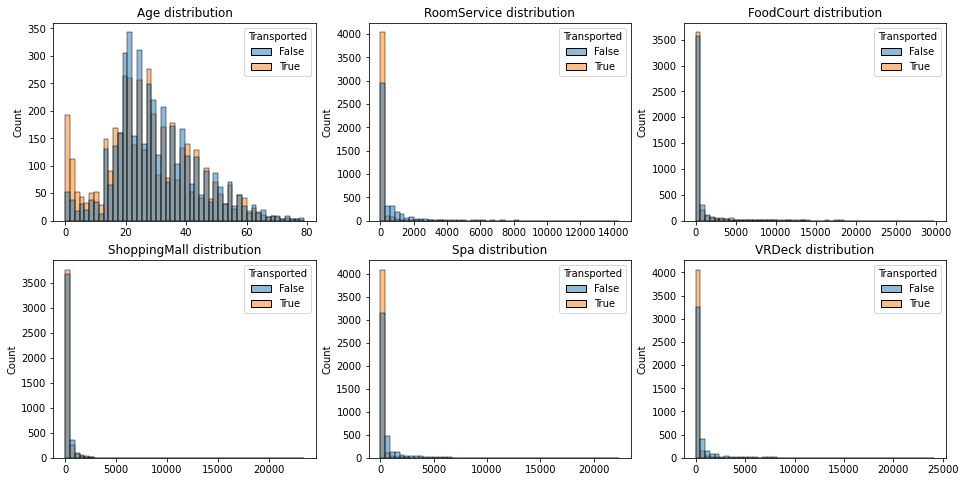

In [84]:
fig, axs = plt.subplots(nrows=display_n_rows, ncols=display_n_cols, figsize=(16, 8))

for idx, column in enumerate(numerical_columns):
    row = idx // display_n_cols
    col = idx % display_n_cols
    sns.histplot(data=df, x=column, hue=target, bins=nb_bins, ax=axs[row, col])
    axs[row, col].set_title(f'{column} distribution')
    axs[row, col].set_xlabel('')

plt.show()

It seems there is an anomaly in the distribution of the 'Age' feature of the transported people.  
People under 20 were proportionaly more transported than people over 20.

In [85]:
transported_under_20 = df[(df.Age <= 20) & df[target]].shape[0]
total_under_20 = df[df.Age <= 20].shape[0]
prop_under_20 = compute_prop(transported_under_20, total_under_20)
transported_over_20 = df[(df.Age > 20) & df[target]].shape[0]
total_over_20 = df[df.Age > 20].shape[0]
prop_over_20 = compute_prop(transported_over_20, total_over_20)
print(f'{prop_under_20:.1f}% of people under 20 have been transported whereas {prop_over_20:.1f}% of people over 20 have been.')

57.4% of people under 20 have been transported whereas 47.6% of people over 20 have been.


#### 1. Age vs target

Text(0.5, 1.0, 'Proportion of people transported by age')

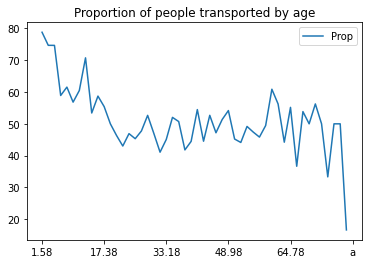

In [86]:
def format_bin(bin, sep=', '):
    ###Format a bin to be used as a dict key###
    bin=str(bin)
    slice_start = bin.find(sep) + len(sep)
    return bin[slice_start:-1]

def binarize(df, column, bins, target):
    ###Create a new DataFrame where a continuous feature is categorize in bins###
    bined_column = pd.cut(df[column], bins=bins)
    bined_column = pd.concat([df[column], bined_column, df[target]], axis=1, keys=[column, 'Bins', target])
    return bined_column

def compute_bin_prop(bined_df, div_by_zero=np.nan):
    ###Compute the proportion by bin, of index where the target is True###
    bin_prop = {}

    for bin in bined_df.Bins.sort_values().unique():
        bin_targeted = bined_df[(bined_df.Bins == bin) & bined_df[target]].shape[0]
        bin_total = bined_df[bined_df.Bins == bin].shape[0]
        bin_prop[format_bin(bin)] = compute_prop(bin_targeted, bin_total, div_by_zero)
    
    return pd.DataFrame(data=bin_prop.values(), index=bin_prop.keys(), columns=['Prop'])

bined_age = binarize(df, column='Age', bins=nb_bins, target=target)
prop_transported_age = compute_bin_prop(bined_age)
prop_transported_age.plot()
plt.title('Proportion of people transported by age')

#### 2. Amenities vs target

In [87]:
for column in skewed_columns:
    nb_zeros_transported = df[(df[column] == 0) & df[target]].shape[0]
    nb_zeros = df[df[column] == 0].shape[0]
    prop_zeros_transported = compute_prop(nb_zeros_transported, nb_transported)
    prop_zeros = compute_prop(nb_zeros, nb_rows)
    print(f'{column}: {prop_zeros_transported:.1f}% ({nb_zeros_transported}) of transported people didn\'t spent anything here' 
    f' (vs {prop_zeros:.1f}% of people which spent nothing here).')

RoomService: 80.7% (3532) of transported people didn't spent anything here (vs 64.2% of people which spent nothing here).
FoodCourt: 73.6% (3224) of transported people didn't spent anything here (vs 62.8% of people which spent nothing here).
ShoppingMall: 76.4% (3345) of transported people didn't spent anything here (vs 64.3% of people which spent nothing here).
Spa: 77.7% (3403) of transported people didn't spent anything here (vs 61.2% of people which spent nothing here).
VRDeck: 78.8% (3451) of transported people didn't spent anything here (vs 63.2% of people which spent nothing here).


In [88]:
zero_spent_transported = total_spent[(total_spent == 0) & df[target]].shape[0]
prop_zero_spent_transported = compute_prop(zero_spent_transported, nb_transported)
print(f'{prop_zero_spent_transported:.1f}% ({zero_spent_transported}) of transported people didn\'t spent anything (vs {prop_zero_spent:.1f}% of total population).')

65.6% (2873) of transported people didn't spent anything (vs 42.0% of total population).


The proportion of people that didn't spent money in the luxury amenities of the spaceship significantly differs between the total population and the transported population (42% vs 66%).

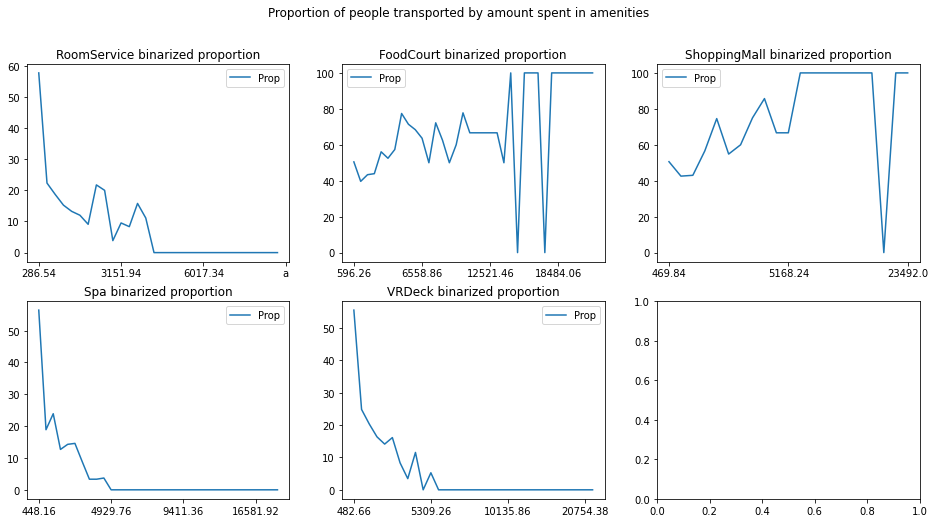

In [89]:
fig, axs = plt.subplots(nrows=display_n_rows, ncols=display_n_cols, figsize=(16, 8))

for idx, column in enumerate(skewed_columns):
    row = idx // display_n_cols
    col = idx % display_n_cols
    bined_column = binarize(df, column=column, bins=nb_bins, target=target)
    prop_bin_column = compute_bin_prop(bined_column)
    prop_bin_column.plot(ax=axs[row, col])
    axs[row, col].locator_params(axis='x', nbins=5)
    axs[row, col].set_title(f'{column} binarized proportion')
    axs[row, col].set_xlabel('')

fig.suptitle('Proportion of people transported by amount spent in amenities')
plt.show()

It seems that the amount of money spent in those amenities influences the transportation of people.
Threshold appears clearly for which it's certain to transported or for which it's impossible. A decision tree could easily capture those insights.

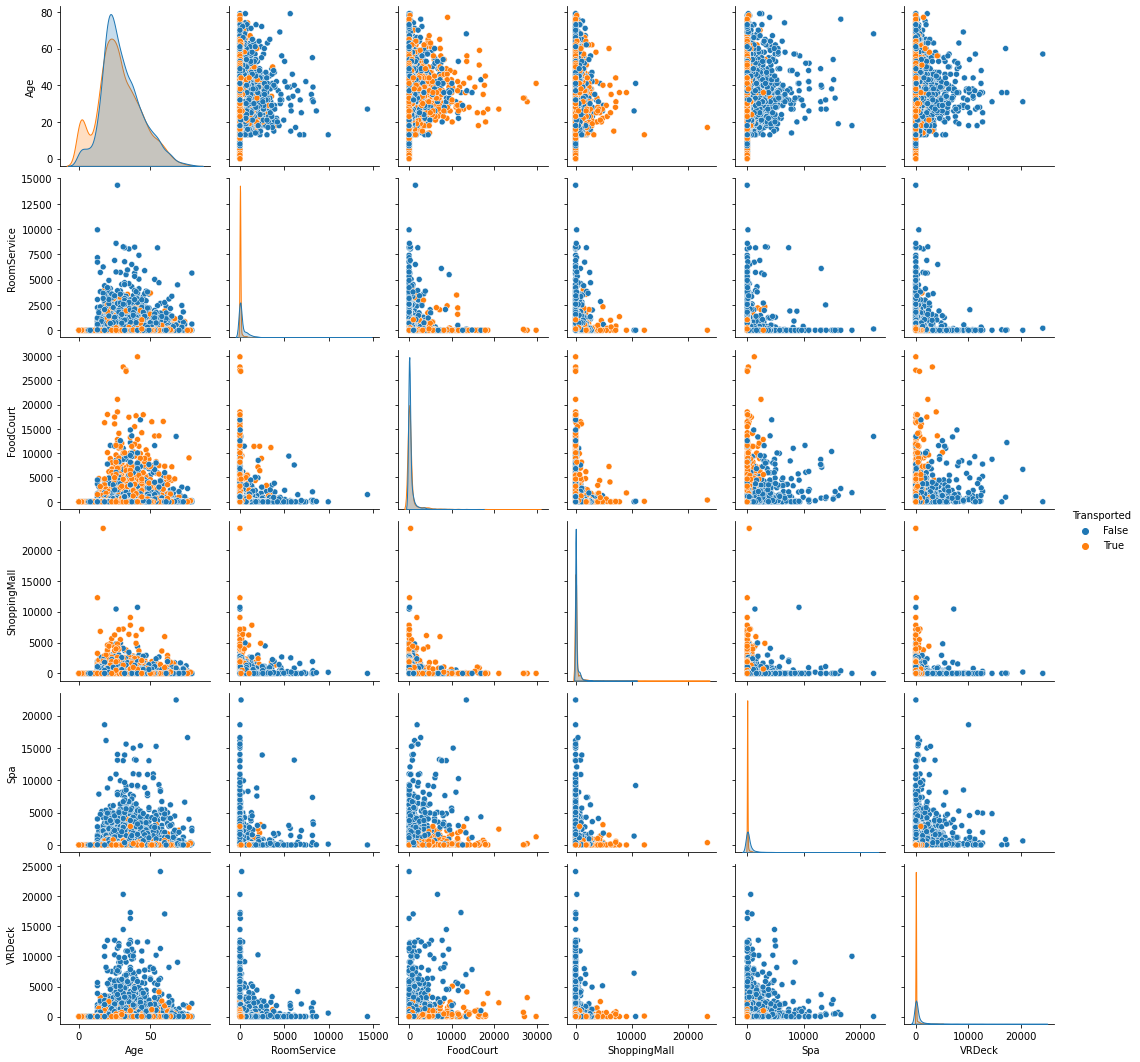

In [90]:
sns.pairplot(df[numerical_columns + [target]], hue=target)

### 3. Correlations between numerical features and the target

<AxesSubplot:>

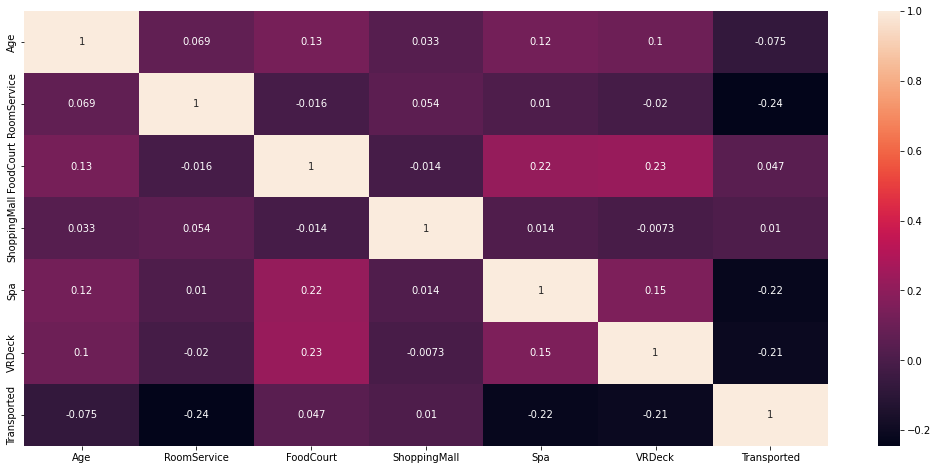

In [91]:
plt.figure(figsize=(18, 8))
sns.heatmap(df[numerical_columns + [target]].corr(), annot=True)

<AxesSubplot:>

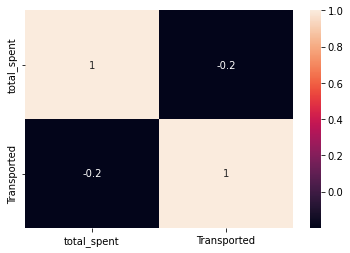

In [155]:
df_total_spent = pd.concat([total_spent, df[target].astype(float)], axis=1)
dict_rename = dict([(col_name, col_name if col_name == target else 'total_spent') for col_name in df_total_spent.columns])
df_total_spent.rename(columns=dict_rename, inplace=True)
sns.heatmap(df_total_spent.corr(), annot=True)

There is no clear correlation (maximum correlation coeff is -0.24).  
As already seen (cf. [4.2.2 Amenities vs target](#2-amenities-vs-target)), the target seems to be slightly negatively correlated with 'Spa', 'VRDeck' and 'RoomService'.

## 5. Categorical features analysis

In [92]:
categorical_columns = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']

### 1. Unique values

In [93]:
for col in categorical_columns:
    nb_val = df[col].unique().shape[0]
    mean_rows_per_value = compute_prop(nb_rows, nb_val, percent=False)
    values_count = df[col].value_counts()
    print(f'{col}: {nb_val} unique values ({mean_rows_per_value:.1f} row{"s" if mean_rows_per_value > 1 else ""} per value)')
    if nb_val < 10:
        total = 0
        for id in values_count.index:
            total += values_count[id]
            print(f'\t{id}: {values_count[id]}')
        print(f'\tNAN: {nb_rows - total}')

HomePlanet: 4 unique values (2173.2 rows per value)
	Earth: 4602
	Europa: 2131
	Mars: 1759
	NAN: 201
CryoSleep: 3 unique values (2897.7 rows per value)
	False: 5439
	True: 3037
	NAN: 217
Cabin: 6561 unique values (1.3 rows per value)
Destination: 4 unique values (2173.2 rows per value)
	TRAPPIST-1e: 5915
	55 Cancri e: 1800
	PSO J318.5-22: 796
	NAN: 182
VIP: 3 unique values (2897.7 rows per value)
	False: 8291
	True: 199
	NAN: 203
Name: 8474 unique values (1.0 rows per value)


Results for 'Cabin' and 'Name' are not surprising. It can be expected that each passenger has an unique name and cabins are shared by few passengers. They might not be really useful to build the machine learning model.  
For these two features, missing values will be filled with a default value.

On the other side, 'CryoSleep' and 'VIP' are booleans (cf. [2.1. DType](#1-dtype)), these results were awaited. They could help to build the model, as 'HomePlanet' and 'Destination'.  
Fot these features, missing values will be filled with the most common value.

In [94]:
helpful_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

### 2. Categorical features vs target

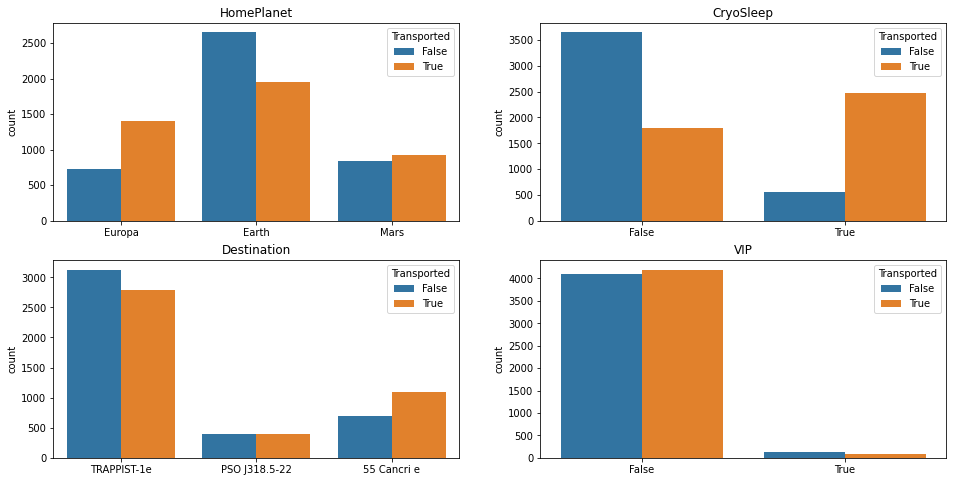

In [95]:
display_n_cols = int(np.ceil(len(helpful_columns) / display_n_rows))
fig, axs = plt.subplots(nrows=display_n_rows, ncols=display_n_cols, figsize=(16, 8))

for idx, column in enumerate(helpful_columns):
    row = idx // display_n_cols
    col = idx % display_n_cols
    sns.countplot(data=df, x=column, hue=target, ax=axs[row, col])
    axs[row, col].set_title(column)
    axs[row, col].set_xlabel('')

plt.show()

Considering the above graphs, several hypothesis can be made :
- 'HomePlanet': coming from Mars has no effect on being transported or not, however coming from the Earth or Europa has an effect ;
- 'CryoSleep' : has an effect ;
- 'Destination' : going to PSO J318.5-22 has no effect on being transported or not, however going to TRAPPIST-1e or 55 Cancri e has an effect ;
- 'VIP' : has no effect.

### 3. Categorical features vs numerical features

In [110]:
from sklearn.preprocessing import OrdinalEncoder

encoded_df = df.drop(columns=['Name', 'Cabin'])
encoder = OrdinalEncoder()

encoded_df[helpful_columns] = encoder.fit_transform(encoded_df[helpful_columns])
encoded_df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
PassengerId,,,,,,,,,,,
0001_01,1.0,0.0,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,False
0002_01,0.0,0.0,2.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,True
0003_01,1.0,0.0,2.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,False
0003_02,1.0,0.0,2.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,False
0004_01,0.0,0.0,2.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...
9276_01,1.0,0.0,0.0,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,False
9278_01,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,False
9279_01,0.0,0.0,2.0,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,True


In [120]:
encoder.categories_

[array(['Earth', 'Europa', 'Mars', nan], dtype=object),
 array([False, True, nan], dtype=object),
 array(['55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e', nan], dtype=object),
 array([False, True, nan], dtype=object)]

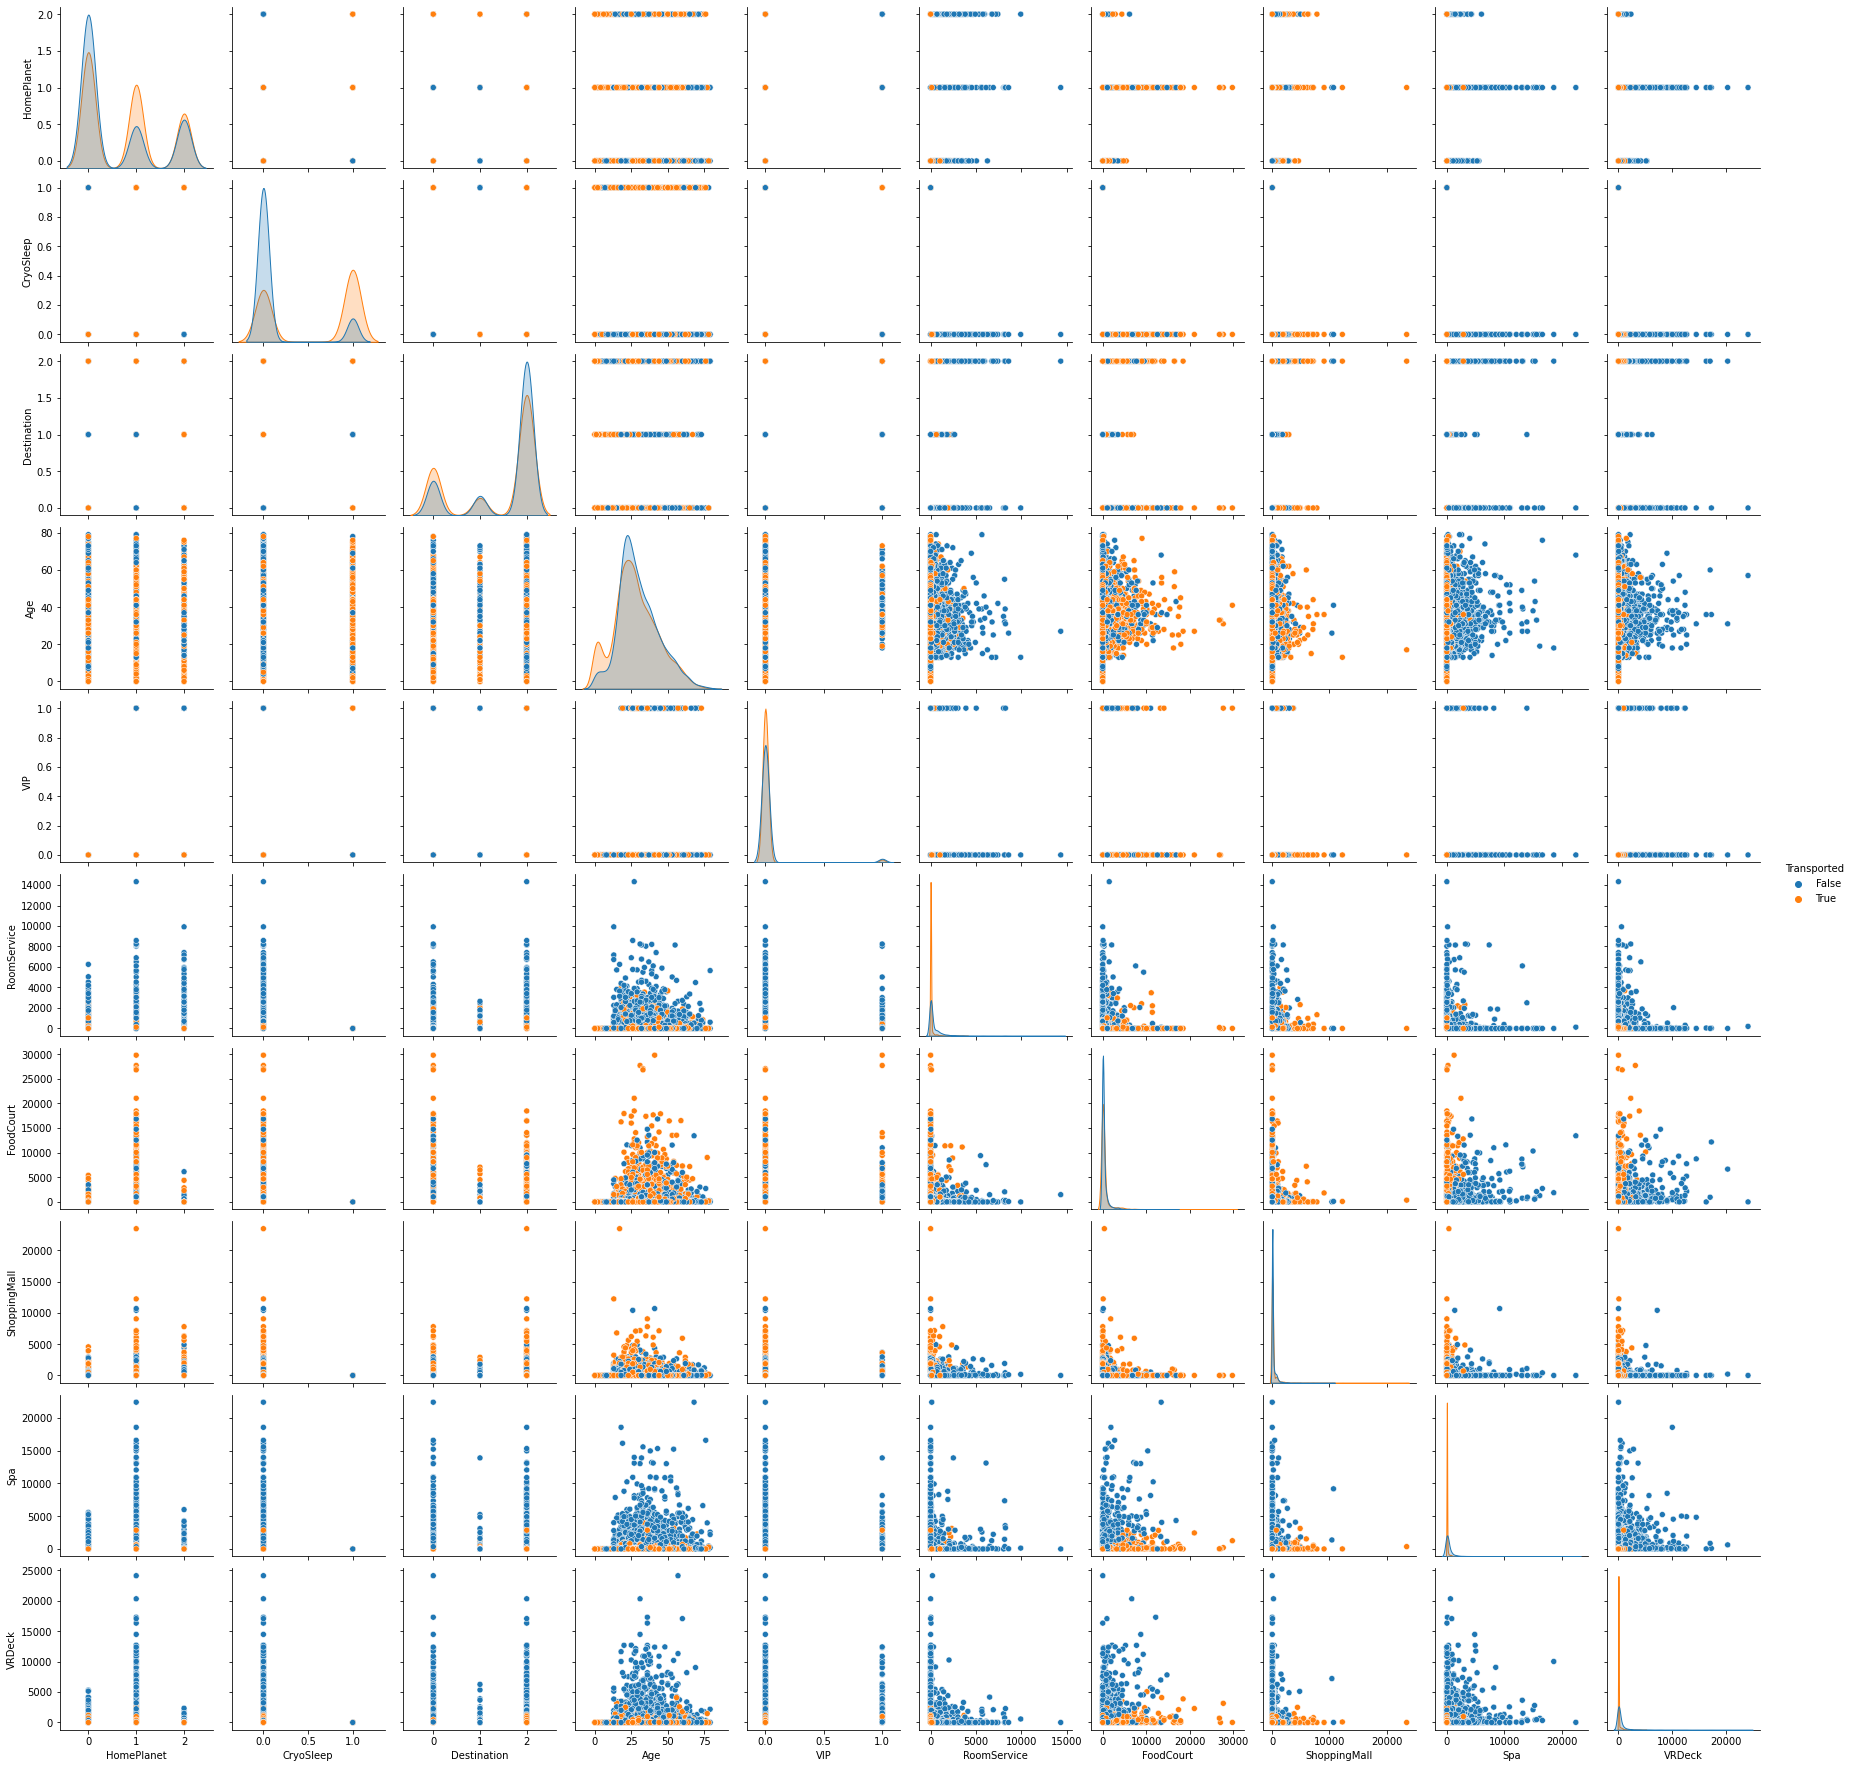

In [117]:
sns.pairplot(encoded_df, hue=target)

### 4. Correlations in the dataset

<AxesSubplot:>

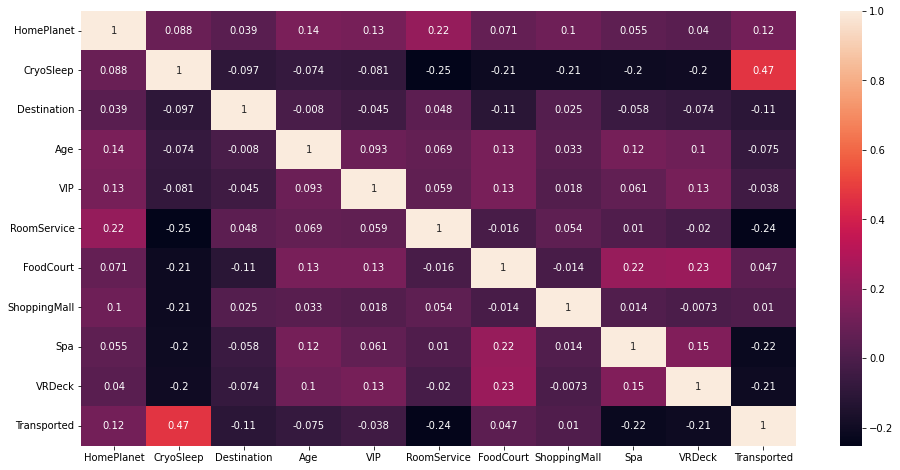

In [113]:
plt.figure(figsize=(16, 8))
sns.heatmap(encoded_df.corr(), annot=True)

As previously stated, 'CryoSleep' seems to have some kind of correlation with the target. This feature also has slight negative correlation with other features ('VRDeck', 'Spa', 'ShoppingMall', 'FoodCourt' and 'RoomService'). People who utilized this service couldn't spend money in the luxury amenities of the spaceship.

For the remaining, there is nothing really significant expected some very slight correlation with the target or between features.

In conclusion, no feature can be excluded because it is redundant with another one and no feature seems to explain completely the target.

## 6. 'Name', 'PassengerId' and 'Cabin' analysis

The encoding of 'PassengerId' and 'Cabin' has a meanings (cf. [Introduction](#introduction)) which can add insights.  
'PassengerId', for example, can inform on the number of relatives a passengers had on board.  
'Cabin' can help locate passengers in the spaceship (deck and side).

## 7. Conclusion

Preprocessing needed:
- Inputting missing values:
    - Mean for 'Age' ;
    - Median for other numerical features ;
    - Most common category for categorical features.
- Feature engineering:
    - 
- Scaling numerical features ;
- Encoding categorical features:
    - One hot encoding for 'HomePlanet' and 'Destination' ;
    - 'VIP' and 'CryoSleep' are booleans, ordinal encoding (false = 0, true = 1) can be applied.
    